# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

torch.Size([64, 1, 28, 28])


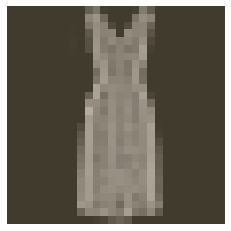

In [2]:
image, label = next(iter(trainloader))
print(image.shape)
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
import torch.nn.functional as F
from torch import nn

class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        # Hidden layers
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        return F.log_softmax(self.output(x), dim=1)
        
        

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
from torch import optim

In [5]:
# hyper parameters
epochs = 40
loss_print_interval = 100

In [6]:
# TODO: Create the network, define the criterion and optimizer
model = Network1()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [7]:
# TODO: Train the network here
for epoch in range(epochs):
    epoch_loss = 0
    step = 0
    for images,labels in trainloader:
        # prepare
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        step+=1
        # Forward
        log_logits = model(images)
        loss = criterion(log_logits, labels)
        # Backward and update
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
        if step%loss_print_interval==0:
            print("Epoch: {}, Step: {}, Loss: {}".format(epoch+1,step,loss.item()))
    else:
        print("\n\nTotal avg. loss at epoch {}: {}\n\n".format(epoch+1, epoch_loss/len(trainloader)))
        

Epoch: 1, Step: 100, Loss: 0.45688003301620483
Epoch: 1, Step: 200, Loss: 0.5178428292274475
Epoch: 1, Step: 300, Loss: 0.526254415512085
Epoch: 1, Step: 400, Loss: 0.6430181860923767
Epoch: 1, Step: 500, Loss: 0.5284648537635803
Epoch: 1, Step: 600, Loss: 0.4337138533592224
Epoch: 1, Step: 700, Loss: 0.3825683295726776
Epoch: 1, Step: 800, Loss: 0.31019341945648193
Epoch: 1, Step: 900, Loss: 0.4042929410934448


Total avg. loss at epoch 1: 0.513608652010147


Epoch: 2, Step: 100, Loss: 0.4815243184566498
Epoch: 2, Step: 200, Loss: 0.25695013999938965
Epoch: 2, Step: 300, Loss: 0.34404420852661133
Epoch: 2, Step: 400, Loss: 0.3908052146434784
Epoch: 2, Step: 500, Loss: 0.2254864126443863
Epoch: 2, Step: 600, Loss: 0.3909693956375122
Epoch: 2, Step: 700, Loss: 0.4821106791496277
Epoch: 2, Step: 800, Loss: 0.4482170343399048
Epoch: 2, Step: 900, Loss: 0.35484760999679565


Total avg. loss at epoch 2: 0.3676994891563204


Epoch: 3, Step: 100, Loss: 0.32499581575393677
Epoch: 3, Step: 200,

Epoch: 18, Step: 400, Loss: 0.178853839635849
Epoch: 18, Step: 500, Loss: 0.14453737437725067
Epoch: 18, Step: 600, Loss: 0.15050916373729706
Epoch: 18, Step: 700, Loss: 0.19310736656188965
Epoch: 18, Step: 800, Loss: 0.1838548332452774
Epoch: 18, Step: 900, Loss: 0.1952601820230484


Total avg. loss at epoch 18: 0.15966738167125533


Epoch: 19, Step: 100, Loss: 0.24177846312522888
Epoch: 19, Step: 200, Loss: 0.06517261266708374
Epoch: 19, Step: 300, Loss: 0.14448867738246918
Epoch: 19, Step: 400, Loss: 0.2062734216451645
Epoch: 19, Step: 500, Loss: 0.2953972816467285
Epoch: 19, Step: 600, Loss: 0.2684515714645386
Epoch: 19, Step: 700, Loss: 0.15938834846019745
Epoch: 19, Step: 800, Loss: 0.08402439951896667
Epoch: 19, Step: 900, Loss: 0.1463690996170044


Total avg. loss at epoch 19: 0.15592554960050373


Epoch: 20, Step: 100, Loss: 0.1350380778312683
Epoch: 20, Step: 200, Loss: 0.1407630294561386
Epoch: 20, Step: 300, Loss: 0.18763777613639832
Epoch: 20, Step: 400, Loss: 0.1314243525

Epoch: 35, Step: 400, Loss: 0.040709108114242554
Epoch: 35, Step: 500, Loss: 0.10284392535686493
Epoch: 35, Step: 600, Loss: 0.07908720523118973
Epoch: 35, Step: 700, Loss: 0.16026386618614197
Epoch: 35, Step: 800, Loss: 0.04455956816673279
Epoch: 35, Step: 900, Loss: 0.04471578821539879


Total avg. loss at epoch 35: 0.09055310973042706


Epoch: 36, Step: 100, Loss: 0.17979033291339874
Epoch: 36, Step: 200, Loss: 0.09836038947105408
Epoch: 36, Step: 300, Loss: 0.17481455206871033
Epoch: 36, Step: 400, Loss: 0.019231431186199188
Epoch: 36, Step: 500, Loss: 0.0551607720553875
Epoch: 36, Step: 600, Loss: 0.14177830517292023
Epoch: 36, Step: 700, Loss: 0.18468794226646423
Epoch: 36, Step: 800, Loss: 0.1053595170378685
Epoch: 36, Step: 900, Loss: 0.25998517870903015


Total avg. loss at epoch 36: 0.08845331867896655


Epoch: 37, Step: 100, Loss: 0.17573429644107819
Epoch: 37, Step: 200, Loss: 0.09728899598121643
Epoch: 37, Step: 300, Loss: 0.06627172231674194
Epoch: 37, Step: 400, Loss: 0.

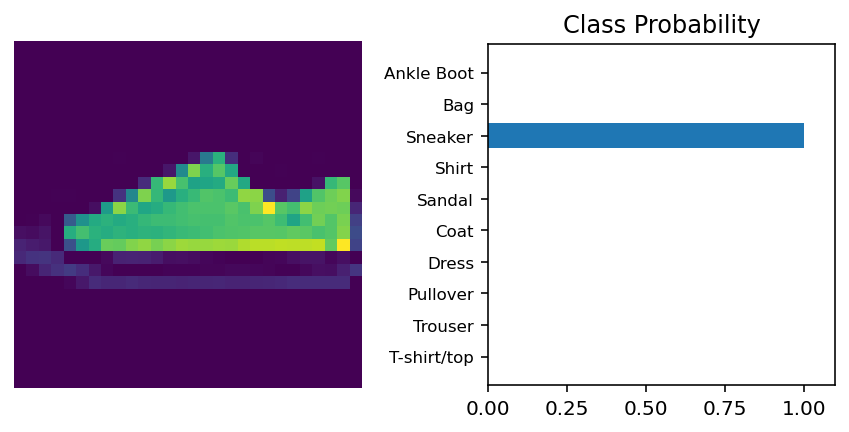

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')